# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

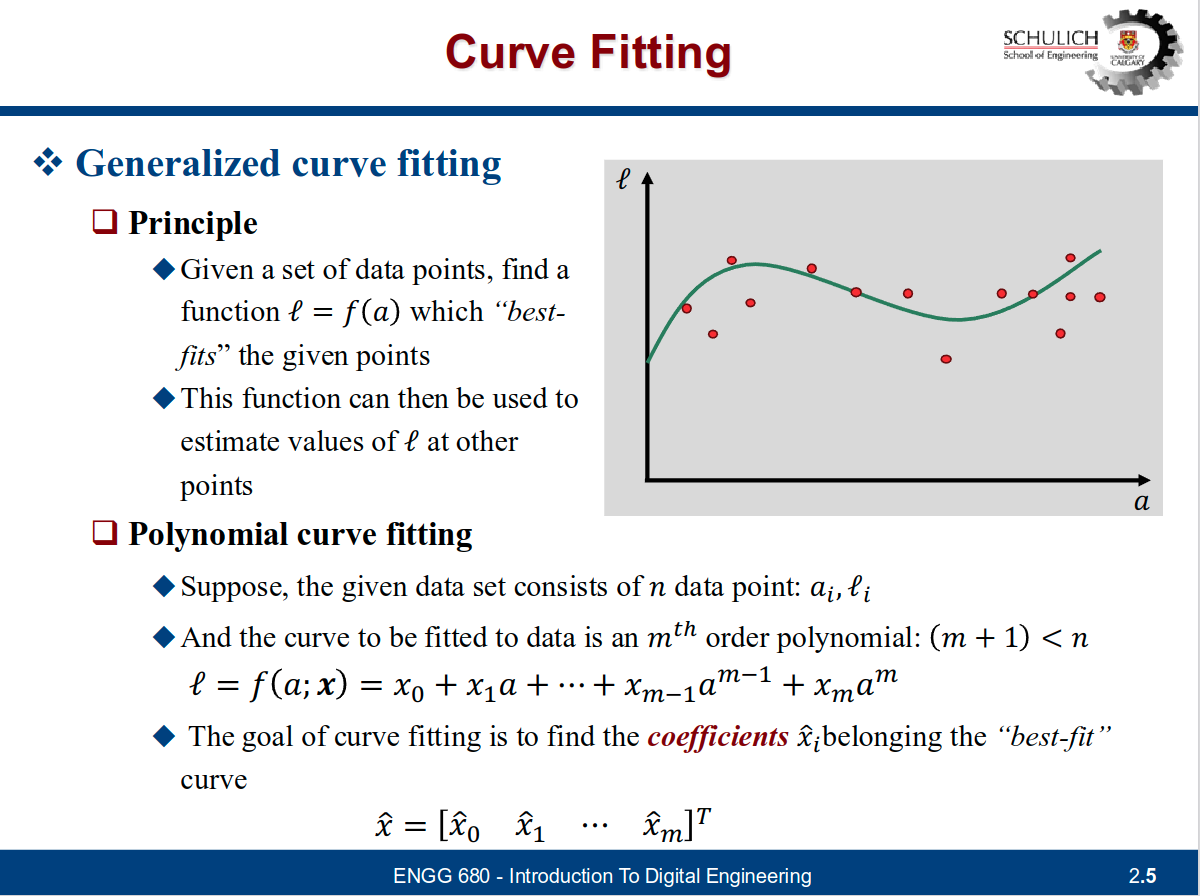

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel("data.xlsx")#...
arr_data = df_data.to_numpy()#...

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]#...
l_true = arr_data[:,2]#...

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = np.shape(l)[0]#...

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P =np.identity(n) #nxn...

# # define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


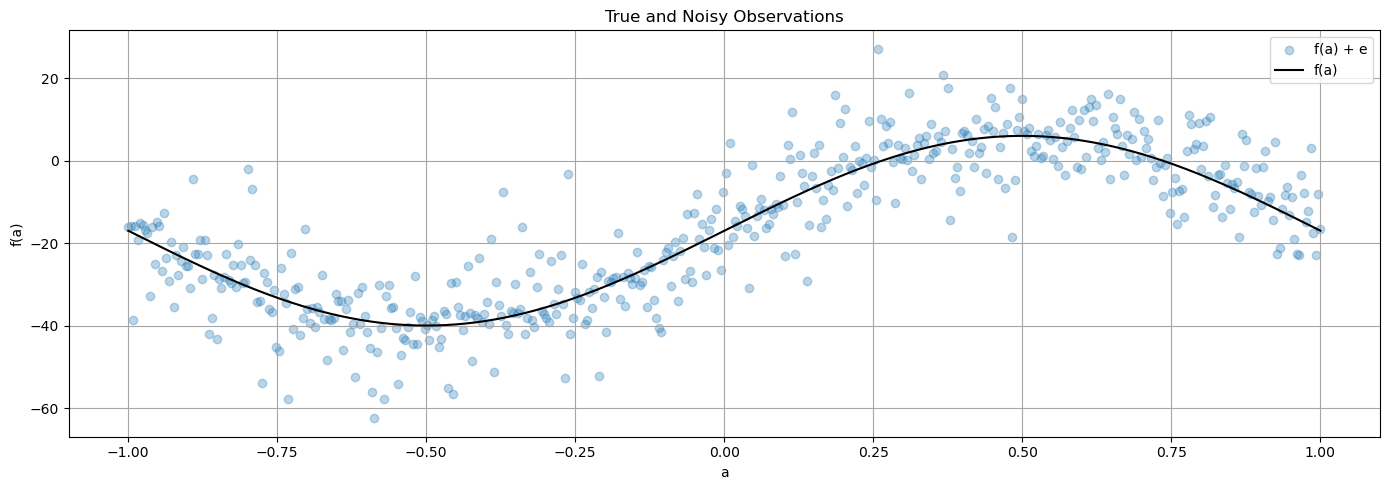

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
min_a = a.min()
max_a = a.max()
scaled_a = 2 * (a - min_a) / (max_a - min_a) - 1
ax.scatter(scaled_a, l, color='tab:blue', marker='o', alpha=0.3, label="f(a) + e")
ax.plot(scaled_a,l_true,label='f(a)',color='k')

# Labels, title, and legend
ax.set_xlabel("a")
ax.set_ylabel("f(a)")
ax.set_title("True and Noisy Observations")
ax.legend()

# X-axis range
# ax.set_xlim([-1, 1])
# ...

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
    # y=x0a^2+x1a+x2;//a is variable
    # l:nX1
    # x:degx1
    # A:nx3
    n=np.shape(a)[0]

    A=np.zeros((n,deg+1))# n cols and deg+1 rows

    for i in range(deg+1):
        A[:,i]=a**i  # fills each column i of matrix A with  a^i .

    x = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ l)
    v=A@x-l

    # Calculate a posterior variance factor (apv)
    apv = (v.T @ P @ v) / (n - deg - 1)

    cov_x=apv*np.linalg.inv(A.T@P@A)

    return (x, cov_x, apv, v)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# ...
# P=np.diag(1/l_var)
P=np.identity((l_var.shape)[0])
[x1, cov_x1, apv1, v1]=fit_polynomial_curve(a,l,P,1)
[x3, cov_x3, apv3, v3]=fit_polynomial_curve(a,l,P,3)
[x5, cov_x5, apv5, v5]=fit_polynomial_curve(a,l,P,5)



In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(x1[::-1],a)#...#reverse the sequence of parameters,as our sequence are[x0,x1,x2],it requires[x2,x1,x0]
cubic_uw = np.polyval(x3[::-1],a)#...
quintic_uw = np.polyval(x5[::-1],a)#...

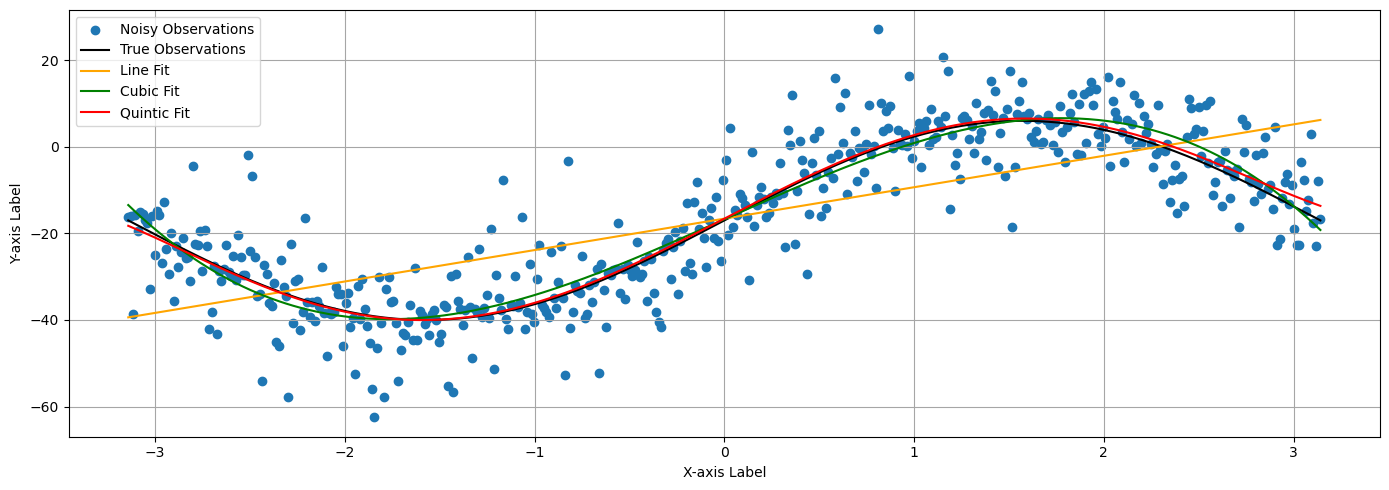

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Plot noisy and true observations
ax.scatter(a,l, label="Noisy Observations")
ax.plot(a,l_true, label="True Observations", color='black')

# Plot polynomial functions for line, cubic, and quintic
ax.plot(a,line_uw, label="Line Fit", color='orange')
ax.plot(a,cubic_uw, label="Cubic Fit", color='green')
ax.plot(a,quintic_uw, label="Quintic Fit", color='red')

# Add labels and grid
ax.set_xlabel("X-axis Label")  # Customize as needed
ax.set_ylabel("Y-axis Label")  # Customize as needed
ax.legend()
ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# ...
print("line fit posterier variance factor",apv1)
print("cubic fit posterier variance factor",apv3)
print("quintic fit posterier variance factor",apv5)


line fit posterier variance factor 162.7426086043221
cubic fit posterier variance factor 66.13227783131883
quintic fit posterier variance factor 63.758344630184205


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# ...
print("L2 norm between predicted (Line Fit) and true observations:", np.linalg.norm(line_uw - l_true))
print("L2 norm between predicted (Cubic Fit) and true observations:", np.linalg.norm(cubic_uw - l_true))
print("L2 norm between predicted (Quintic Fit) and true observations:", np.linalg.norm(quintic_uw - l_true))


L2 norm between predicted (Line Fit) and true observations: 229.0601679674409
L2 norm between predicted (Cubic Fit) and true observations: 38.285979929116614
L2 norm between predicted (Quintic Fit) and true observations: 17.369967196967007


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# The norm and posterier variance factor of quintic are smaller than those who have less degrees
#The more variables(degree) you apply in the fitting, the better the results are.



In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P =np.diag(1/l_var) #...

line fit posterier variance factor 12.054651233436903
cubic fit posterier variance factor 1.144464702653713
quintic fit posterier variance factor 0.9447009043856545
L2 norm between predicted (Line Fit) and true observations: 230.6776081383295
L2 norm between predicted (Cubic Fit) and true observations: 36.07026687266813
L2 norm between predicted (Quintic Fit) and true observations: 5.741606915883022


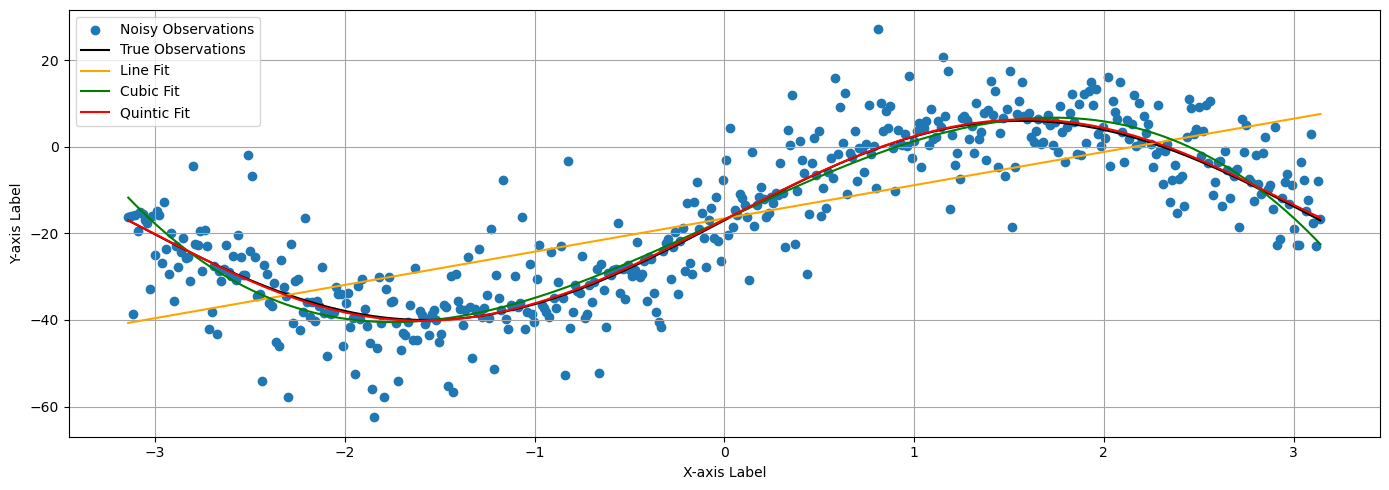

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...
[x1, cov_x1, apv1, v1]=fit_polynomial_curve(a,l,P,1)
[x3, cov_x3, apv3, v3]=fit_polynomial_curve(a,l,P,3)
[x5, cov_x5, apv5, v5]=fit_polynomial_curve(a,l,P,5)

line_uw = np.polyval(x1[::-1],a)#...#reverse the sequence of parameters,as our sequence are[x0,x1,x2],it requires[x2,x1,x0]
cubic_uw = np.polyval(x3[::-1],a)#...
quintic_uw = np.polyval(x5[::-1],a)#...

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Plot noisy and true observations
ax.scatter(a,l, label="Noisy Observations")
ax.plot(a,l_true, label="True Observations", color='black')

# Plot polynomial functions for line, cubic, and quintic
ax.plot(a,line_uw, label="Line Fit", color='orange')
ax.plot(a,cubic_uw, label="Cubic Fit", color='green')
ax.plot(a,quintic_uw, label="Quintic Fit", color='red')

# Add labels and grid
ax.set_xlabel("X-axis Label")  # Customize as needed
ax.set_ylabel("Y-axis Label")  # Customize as needed
ax.legend()
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

print("line fit posterier variance factor",apv1)
print("cubic fit posterier variance factor",apv3)
print("quintic fit posterier variance factor",apv5)

print("L2 norm between predicted (Line Fit) and true observations:", np.linalg.norm(line_uw - l_true))
print("L2 norm between predicted (Cubic Fit) and true observations:", np.linalg.norm(cubic_uw - l_true))
print("L2 norm between predicted (Quintic Fit) and true observations:", np.linalg.norm(quintic_uw - l_true))

In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...
# The posterier variance factor decreases norminently compared with unweighted LSE
# The norm for Quintic Fit decreases norminently, and we can see a little decrease in Cubic Fit.
# However, the norm for Line fit increases a little bit. Because the data is too complicated to use a line to fit,by applying a more accurate data, the norm cannot be improved

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

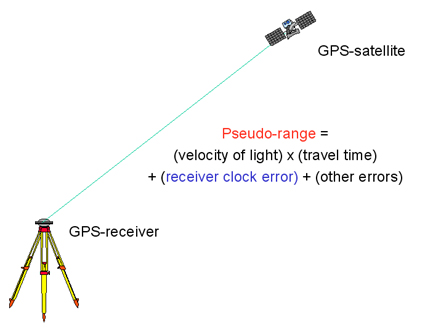

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)

#Loading pseudorange measurements and satellite position files
df_pseudorange = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

#Converting to numpy array
pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()


In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)

#Defining measurements and states
n = pseudorange.shape[0] #11
m = 4

print(f"The number of measurements are {n} and the number of states are {m}")

The number of measurements are 11 and the number of states are 4


In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)

#Creating weight matrix P as identity
P = np.identity(11)


In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)


#Setting initial states as zeros
x_0 = np.zeros((4,1))


In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)

#Initializing initial arrays for LSA
delta = np.ones((4,1))
counter = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)

#Self defined euclidian norm for computing distance
def euclidean_norm(receiver_pos, satellite_pos):

  distance = np.empty((satellite_pos.shape[0], 1))

  for i, row in enumerate(satellite_pos):
    distance[i] = np.sqrt((row[1] - receiver_pos[0])**2 + (row[2] - receiver_pos[1])**2 + (row[3] - receiver_pos[2])**2)

  return distance


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)

#Function for computing A matrix for LSA, function is called each iteration
def design_matrix(r_pos, s_pos, rho):
  A = np.zeros((11,4))

  for i, row in enumerate(A):
    row[0] = (r_pos[0] - s_pos[i][1])/rho[i]
    row[1] = (r_pos[1] - s_pos[i][2])/rho[i]
    row[2] = (r_pos[2] - s_pos[i][3])/rho[i]
    row[3] = 1

  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

#While loop performing LSA with stop criteria of 0.001 for X,Y,Z position delta or max 50 iterations
while (np.linalg.norm(delta[:3]) > 0.001 and counter < 50):

    # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
    # (1 marks)
    rho = euclidean_norm(x_0, sat_pos)

    # compute the design matrix A
    # (1 marks)
    A = design_matrix(x_0, sat_pos, rho)

    # compute the misclosure array w
    # (1 marks)
    w =  rho - pseudorange[:,1].reshape(11,1)

    # compute the corrections delta
    # (1 marks)
    delta = -np.linalg.inv(A.T@P@A)@A.T@P@w

    # update the states
    # (1 marks)
    x_hat = x_0 + delta
    x_0 = x_hat

    # compute the position error from using the updated states against groundtruth
    # (1 marks)

    err_pos = GroundTruth.reshape(3,1) - x_hat[:3]
    #Computing the residuals v
    v = A@delta + w

    # update the counter i, (i.e., increament of 1 for each iteration)
    # (1 mark)
    counter += 1
    print(f"Iteration {counter}: delta = {delta.flatten()}, w = {w.flatten()}, err_pos = {err_pos.flatten()}")

    # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
    # (1 marks)
    arr_w.append(w)
    arr_delta.append(delta)
    arr_err_pos.append(err_pos)
    arr_i.append(counter)



# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = v.T@P@v/(n-m)
print(apv)
# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv*np.linalg.inv(A.T@P@A)




Iteration 1: delta = [-1922855.7836262  -4255895.277136    5906176.36777537  1229806.28016079], w = [3534543.32140303 5881051.00917708 3877416.30446588 3766833.34553794
 4353761.43463428 1101071.29806546 2801964.48121247 2283828.13684117
 4999960.35362056 1968296.47568328 6343828.97100315], err_pos = [ 289366.40394895  604268.09463237 -953694.74822619]
Iteration 2: delta = [ 282444.35616728  590161.20612119 -924741.33101372   36300.70504456], w = [ -450967.56939745 -1011250.77107607  -547190.08656275  -611154.96953302
  -628118.83744043  -114202.51204255  -401671.02950418  -306461.62944879
  -840033.70902522  -259739.77698835 -1163916.75476332], err_pos = [  6922.04778167  14106.88851118 -28953.41721247]
Iteration 3: delta = [  6913.82931891  14094.30541669 -28924.68400646     36.5310586 ], w = [-10961.84334746 -27278.37601962 -14895.76028966 -19490.35750546
 -15161.47685131  -7479.34835165 -14351.03277073 -12052.39908053
 -23703.47731379 -10258.20582922 -32697.7198783 ], err_pos = [  

In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

print(f"""Estimate States: {x_hat.flatten()} \n""")


print("Corrections Array:")
for i, correction in enumerate(arr_delta):
    print(f"Correction {i+1}:\n{correction}\n")

print(f"""Estimated Measurement Residuals:
{v} \n
A posteriori Variance: {apv} \n
Covariance Matrix of estimated states Cx:
{C_x_hat} \n
Iterations: {counter} \n
3-D Position Errors:
{err_pos}""")



Estimate States: [-1633492.44451686 -3651629.54237943  4952485.43270835  1266156.46031266] 

Corrections Array:
Correction 1:
[[-1922855.7836262 ]
 [-4255895.277136  ]
 [ 5906176.36777537]
 [ 1229806.28016079]]

Correction 2:
[[ 282444.35616728]
 [ 590161.20612119]
 [-924741.33101372]
 [  36300.70504456]]

Correction 3:
[[  6913.82931891]
 [ 14094.30541669]
 [-28924.68400646]
 [    36.5310586 ]]

Correction 4:
[[  5.15361993]
 [ 10.2232123 ]
 [-24.92002924]
 [  6.47203481]]

Correction 5:
[[ 3.22953832e-06]
 [ 6.39177770e-06]
 [-1.75919197e-05]
 [ 6.47201390e+00]]

Estimated Measurement Residuals:
[[-0.25997571]
 [-0.11117279]
 [ 1.09950209]
 [ 0.00500054]
 [-0.20031684]
 [ 1.41815427]
 [ 0.09126721]
 [-1.5120914 ]
 [-0.26365487]
 [-0.61138618]
 [ 0.34467368]] 

A posteriori Variance: [[0.88528885]] 

Covariance Matrix of estimated states Cx: 
[[ 0.28298264  0.06167139 -0.07487066 -0.06468701]
 [ 0.06167139  0.37666273 -0.51441611 -0.32601524]
 [-0.07487066 -0.51441611  1.81094828  0.9

In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
"""
Examining the Aposteriori variance factor it is clear that the initial estimates of accuracy were accurate and that using
the measurements improved precision in the parameter estimates in comparison to the initial uncertainty.Our a-post being
close to the initial a-post exemplifies that there are likely no outliers as a global test.

The covariance matrix shows that the Z-coordinate has the highest uncertainty which is in line with expectations of GNSS
#positioning.
"""
# (2 marks)

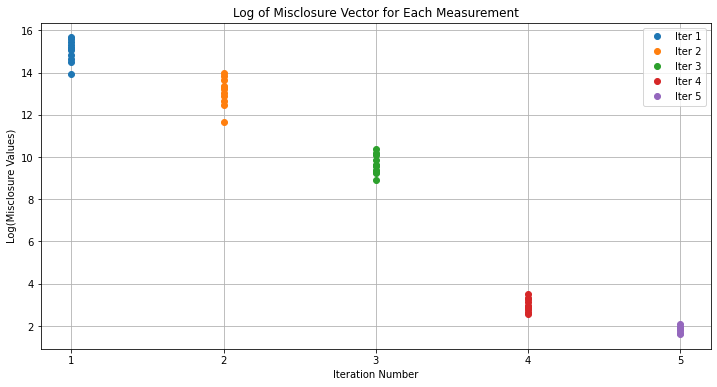

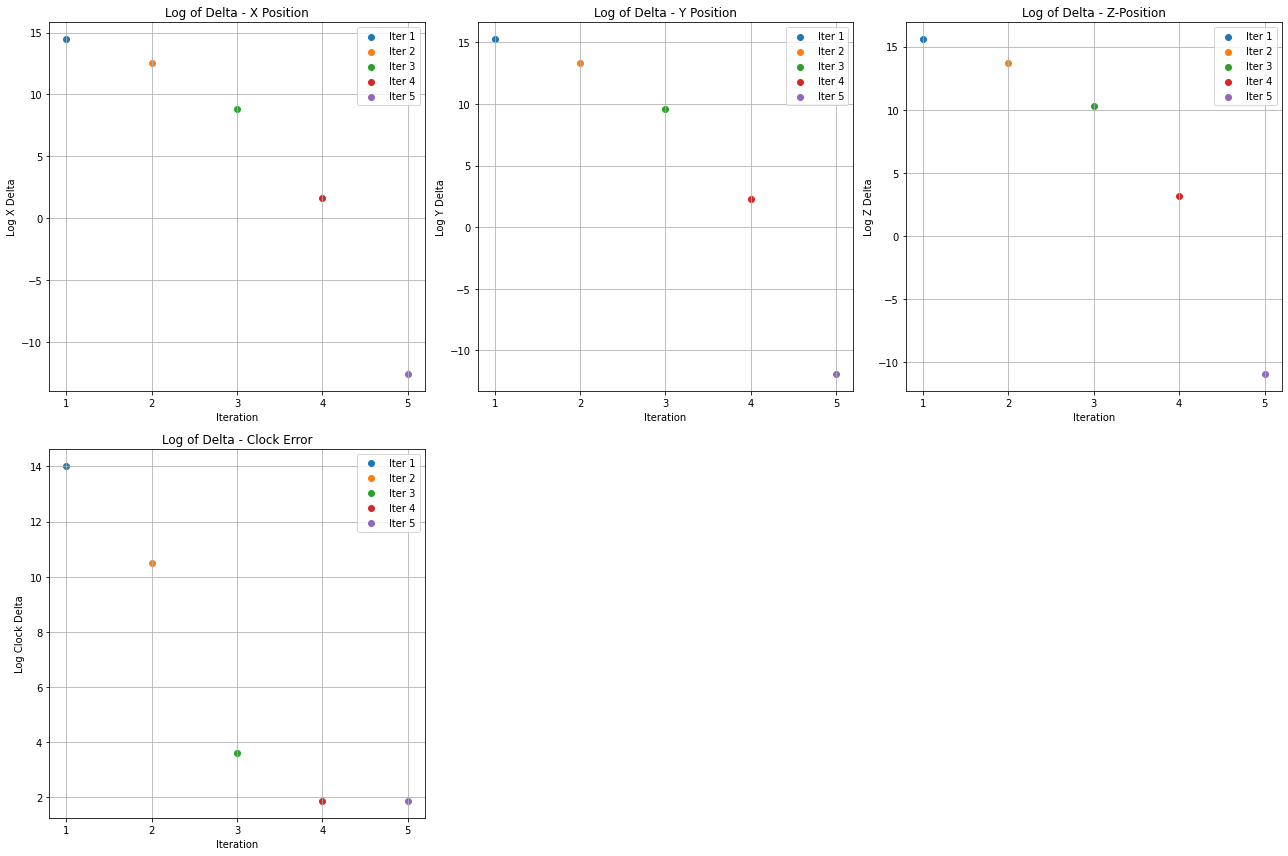

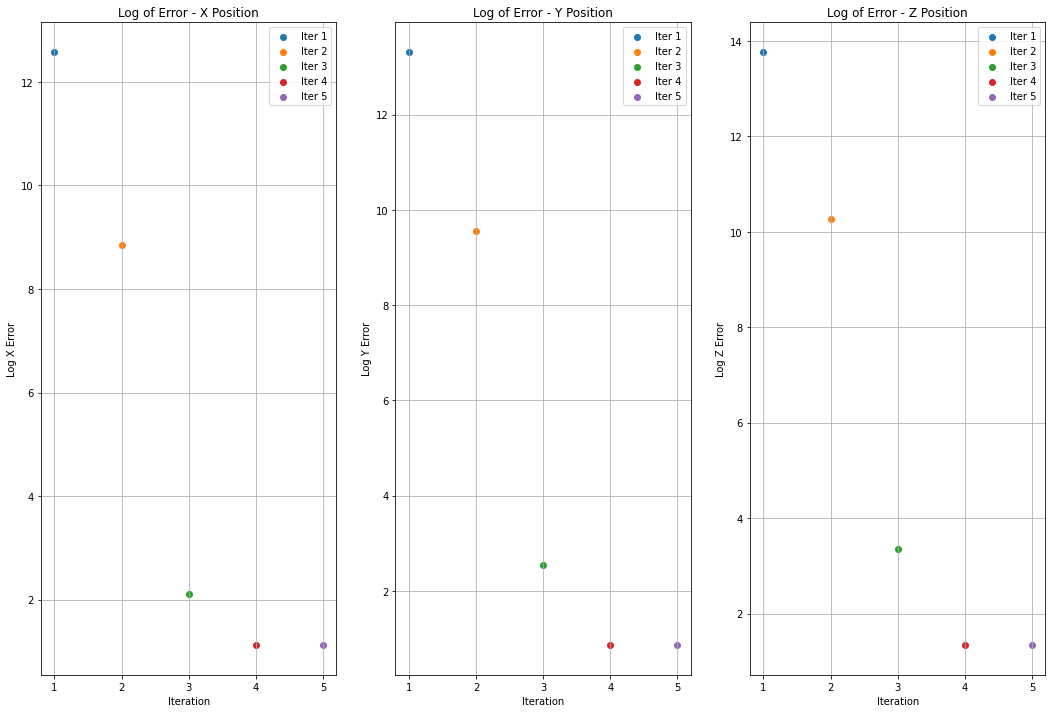

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


log_misclosure = [np.log(np.abs(w)).flatten() for w in arr_w] #Taking the log of all values (absolute value to avoid log of negatives)

#plot for log of misclosure
plt.figure(figsize=(12, 6))

for i, log_values in enumerate(log_misclosure):
    plt.plot([arr_i[i]] * len(log_values), log_values, 'o', label=f'Iter {i+1}')



plt.title('Log of Misclosure Vector for Each Measurement')
plt.xlabel('Iteration Number')
plt.ylabel('Log(Misclosure Values)')
plt.grid()
plt.xticks(arr_i)  # Set x-ticks to be the iteration numbers
plt.legend()
plt.show()





# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)

# Figure with three subplots arranged horizontally and a fourth below for clock delta
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns



#Subplot for the Log X delta for each iteration
for i in range(len(arr_i)):
    log_values = np.log(np.abs(arr_delta[i]))  #Taking the log of all values (absolute value to avoid log of negatives)
    axs[0, 0].scatter(arr_i[i], log_values[0], label=f'Iter {arr_i[i]}')
axs[0, 0].set_title('Log of Delta - X Position')
axs[0, 0].set_xlabel('Iteration')
axs[0, 0].set_ylabel('Log X Delta')
axs[0, 0].grid()
axs[0, 0].set_xticks(arr_i)
axs[0, 0].legend()

#Subplot for the Log Y delta for each iteration
for i in range(len(arr_i)):
    log_values = np.log(np.abs(arr_delta[i]))  #Taking the log of all values (absolute value to avoid log of negatives)
    axs[0, 1].scatter(arr_i[i], log_values[1], label=f'Iter {arr_i[i]}')
axs[0, 1].set_title('Log of Delta - Y Position')
axs[0, 1].set_xlabel('Iteration')
axs[0, 1].set_ylabel('Log Y Delta')
axs[0, 1].grid()
axs[0, 1].set_xticks(arr_i)
axs[0, 1].legend()

#Subplot for the Log Z delta for each iteration
for i in range(len(arr_i)):
    log_values = np.log(np.abs(arr_delta[i]))  #Taking the log of all values (absolute value to avoid log of negatives)
    axs[0, 2].scatter(arr_i[i], log_values[2], label=f'Iter {arr_i[i]}')
axs[0, 2].set_title('Log of Delta - Z-Position')
axs[0, 2].set_xlabel('Iteration')
axs[0, 2].set_ylabel('Log Z Delta')
axs[0, 2].grid()
axs[0, 2].set_xticks(arr_i)
axs[0, 2].legend()

#Subplot for the Log clock delta for each iteration
for i in range(len(arr_i)):
    log_values = np.log(np.abs(arr_delta[i]))  #Taking the log of all values (absolute value to avoid log of negatives)
    axs[1, 0].scatter(arr_i[i], log_values[3], label=f'Iter {arr_i[i]}')
axs[1, 0].set_title('Log of Delta - Clock Error')
axs[1, 0].set_xlabel('Iteration')
axs[1, 0].set_ylabel('Log Clock Delta')
axs[1, 0].grid()
axs[1, 0].set_xticks(arr_i)
axs[1, 0].legend()

# Hide the empty subplots (second and third positions in the second row)
axs[1, 1].axis('off')
axs[1, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

fig, axs = plt.subplots(1, 3, figsize=(18, 12))  # 1 rows, 3 columns

#Subplot for Log X error for each iteration
for i in range(len(arr_i)):
    log_values = np.log(np.abs(arr_err_pos[i]))  #Taking the log of all values (absolute value to avoid log of negatives)
    axs[0].scatter(arr_i[i], log_values[0], label=f'Iter {arr_i[i]}')
axs[0].set_title('Log of Error - X Position')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Log X Error')
axs[0].grid()
axs[0].set_xticks(arr_i)
axs[0].legend()

#Subplot for Log Y error for each iteration
for i in range(len(arr_i)):
    log_values = np.log(np.abs(arr_err_pos[i]))  #Taking the log of all values (absolute value to avoid log of negatives)
    axs[1].scatter(arr_i[i], log_values[1], label=f'Iter {arr_i[i]}')
axs[1].set_title('Log of Error - Y Position')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Log Y Error')
axs[1].grid()
axs[1].set_xticks(arr_i)
axs[1].legend()

#Subplot for Log Z error for each iteration
for i in range(len(arr_i)):
    log_values = np.log(np.abs(arr_err_pos[i]))  #Taking the log of all values (absolute value to avoid log of negatives)
    axs[2].scatter(arr_i[i], log_values[2], label=f'Iter {arr_i[i]}')
axs[2].set_title('Log of Error - Z Position')
axs[2].set_xlabel('Iteration')
axs[2].set_ylabel('Log Z Error')
axs[2].grid()
axs[2].set_xticks(arr_i)
axs[2].legend()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

"""
Examining the plot of the log misclosure values w over each iteration, as the plot displays a linear trend, this means that the
misclosure is reducing exponentially with each iteration towards convergence. This confirms the success of the LSA.

Examining the plot of the log delta values for the position values (x, y, z), the largest change is between iteration 4 and 5,
as the delta values become very small (negative on the logorithmic scale). This shows how the LSA converging results in very small
updates to the vector of parameters x_hat. The plot of the log delta values for the clock error reduce at a similar rate but stop
reducing when the clock error is determined, with the delta value staying constant.

The log error values of position (x, y, z) reduce rapidly for the first, second, and third iteration as the LSA is converging with
big delta values for each iteration. However, as the LSA converges, the update to the parameters reduces (small delta), so the
changes become less significant and the values converge as can be seen for the 4th to 5th iteration.



"""

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
